In [55]:
from keras.datasets import cifar100
import numpy as np
import collections
from matplotlib import pyplot
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0

In [56]:
data = cifar100.load_data(label_mode='fine')
(x_train, y_train), (x_test, y_test) = data

In [58]:
# Categories selected : [clock, telephone, bed, couch, bottle, television, chair, tree, bicycle, bowl]
categories = [22,86,5,25,9,87,20,47,8,10]
X_train = []
Y_train =[]
k = 0
for i in categories:
    for j in range(500):
        X_train.append(x_train[np.where(y_train == i)[0][j]])
        Y_train.append(k)
    k += 1
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train.shape,Y_train.shape

((5000, 32, 32, 3), (5000,))

In [59]:
# Categories selected : [clock, telephone, bed, couch, bottle, television, chair, tree, bicycle, bowl]
categories = [22,86,5,25,9,87,20,47,8,10]
X_test = []
Y_test =[]
k = 0
for i in categories:
    for j in range(100):
        X_test.append(x_test[np.where(y_test == i)[0][j]])
        Y_test.append(k)
    k += 1
    
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test.shape, Y_test.shape

((1000, 32, 32, 3), (1000,))

In [60]:
#data size
len(X_train)+len(X_test)

6000

In [61]:
#sample dimensions
X_train[0].shape

(32, 32, 3)

In [62]:
#train data calsses
unique, counts = numpy.unique(Y_train, return_counts=True)
dict(zip(unique, counts))

{0: 500,
 1: 500,
 2: 500,
 3: 500,
 4: 500,
 5: 500,
 6: 500,
 7: 500,
 8: 500,
 9: 500}

In [63]:
#test data calsses
unique, counts = numpy.unique(Y_test, return_counts=True)
dict(zip(unique, counts))

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100}

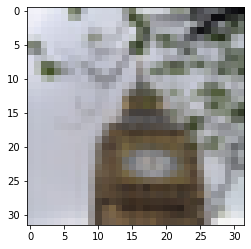

In [68]:
pyplot.imshow(X_train[0],cmap='binary')

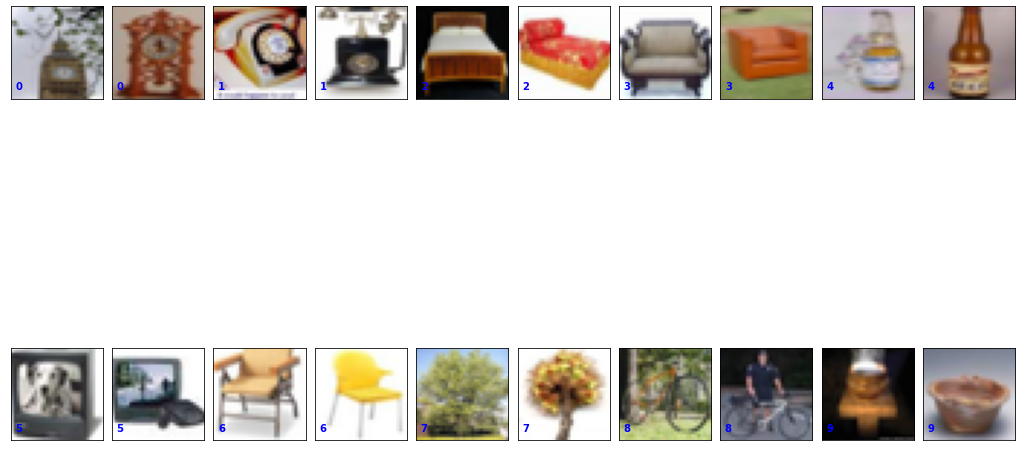

In [81]:
#ploting samples of the data
def plot_multiple_imgs(X,y,nrow=2,ncol=2,figsize=(13,7),preds=None,skip=0):
    fig,ax = pyplot.subplots(nrows=nrow,ncols=ncol,figsize=figsize)
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(nrow*ncol):
        ax[i//ncol,i%ncol].imshow(X[skip+i*250],cmap='binary')
        ax[i//ncol,i%ncol].set_xticks([])
        ax[i//ncol,i%ncol].set_yticks([])
        if preds is not None:
            ax[i//ncol,i%ncol].text(0.85, 0.1, str(preds[skip+i]), transform=ax[i//ncol,i%ncol].transAxes,
                                   color='green' if y[skip+i*250]==preds[skip+i] else 'red',weight='bold')
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i*250]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
        else:
            ax[i//ncol,i%ncol].text(0.05, 0.1, str(y[skip+i*250]), color='blue',transform=ax[i//ncol,i%ncol].transAxes,weight='bold')
    pyplot.show()
plot_multiple_imgs(X_train, Y_train, 2, 10,(18,12))

In [82]:
y_train = to_categorical(Y_train, 10)
y_test = to_categorical(Y_test, 10)
x_train = X_train
x_test = X_test
y_train.shape, y_test.shape

((5000, 10), (1000, 10))

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [84]:
#building the model
model = Sequential()

model.add(Conv2D(128,(3,3), padding = 'same',activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3),activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

In [85]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.0001, decay = 1e-6), metrics=['accuracy'])

In [86]:
#Train the model
hist=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 2s 26ms/step - loss: 3.1934 - accuracy: 0.1180 - val_loss: 2.2125 - val_accuracy: 0.1950
Epoch 2/50
63/63 [==============================] - 1s 20ms/step - loss: 2.2230 - accuracy: 0.1940 - val_loss: 2.1292 - val_accuracy: 0.2290
Epoch 3/50
63/63 [==============================] - 1s 20ms/step - loss: 2.1043 - accuracy: 0.2488 - val_loss: 1.9003 - val_accuracy: 0.3710
Epoch 4/50
63/63 [==============================] - 1s 20ms/step - loss: 1.9310 - accuracy: 0.3150 - val_loss: 1.7261 - val_accuracy: 0.4220
Epoch 5/50
63/63 [==============================] - 1s 20ms/step - loss: 1.8130 - accuracy: 0.3643 - val_loss: 1.8089 - val_accuracy: 0.3890
Epoch 6/50
63/63 [==============================] - 1s 21ms/step - loss: 1.6927 - accuracy: 0.4210 - val_loss: 1.5992 - val_accuracy: 0.4150
Epoch 7/50
63/63 [==============================] - 1s 20ms/step - loss: 1.6155 - accuracy: 0.4333 - val_loss: 1.4333 - val_accuracy: 0.5450
Epoch 8/50
63

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

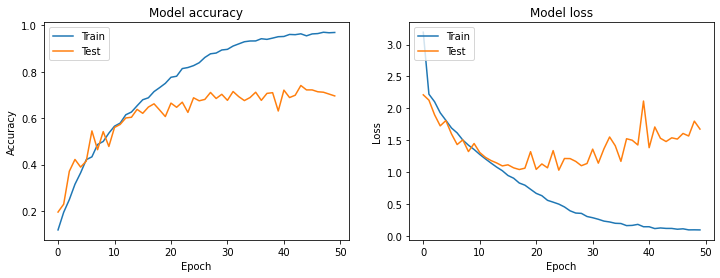

In [88]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

model accuracy on test set is: 67.50%


Text(0.5, 1.0, 'classification results on test set')

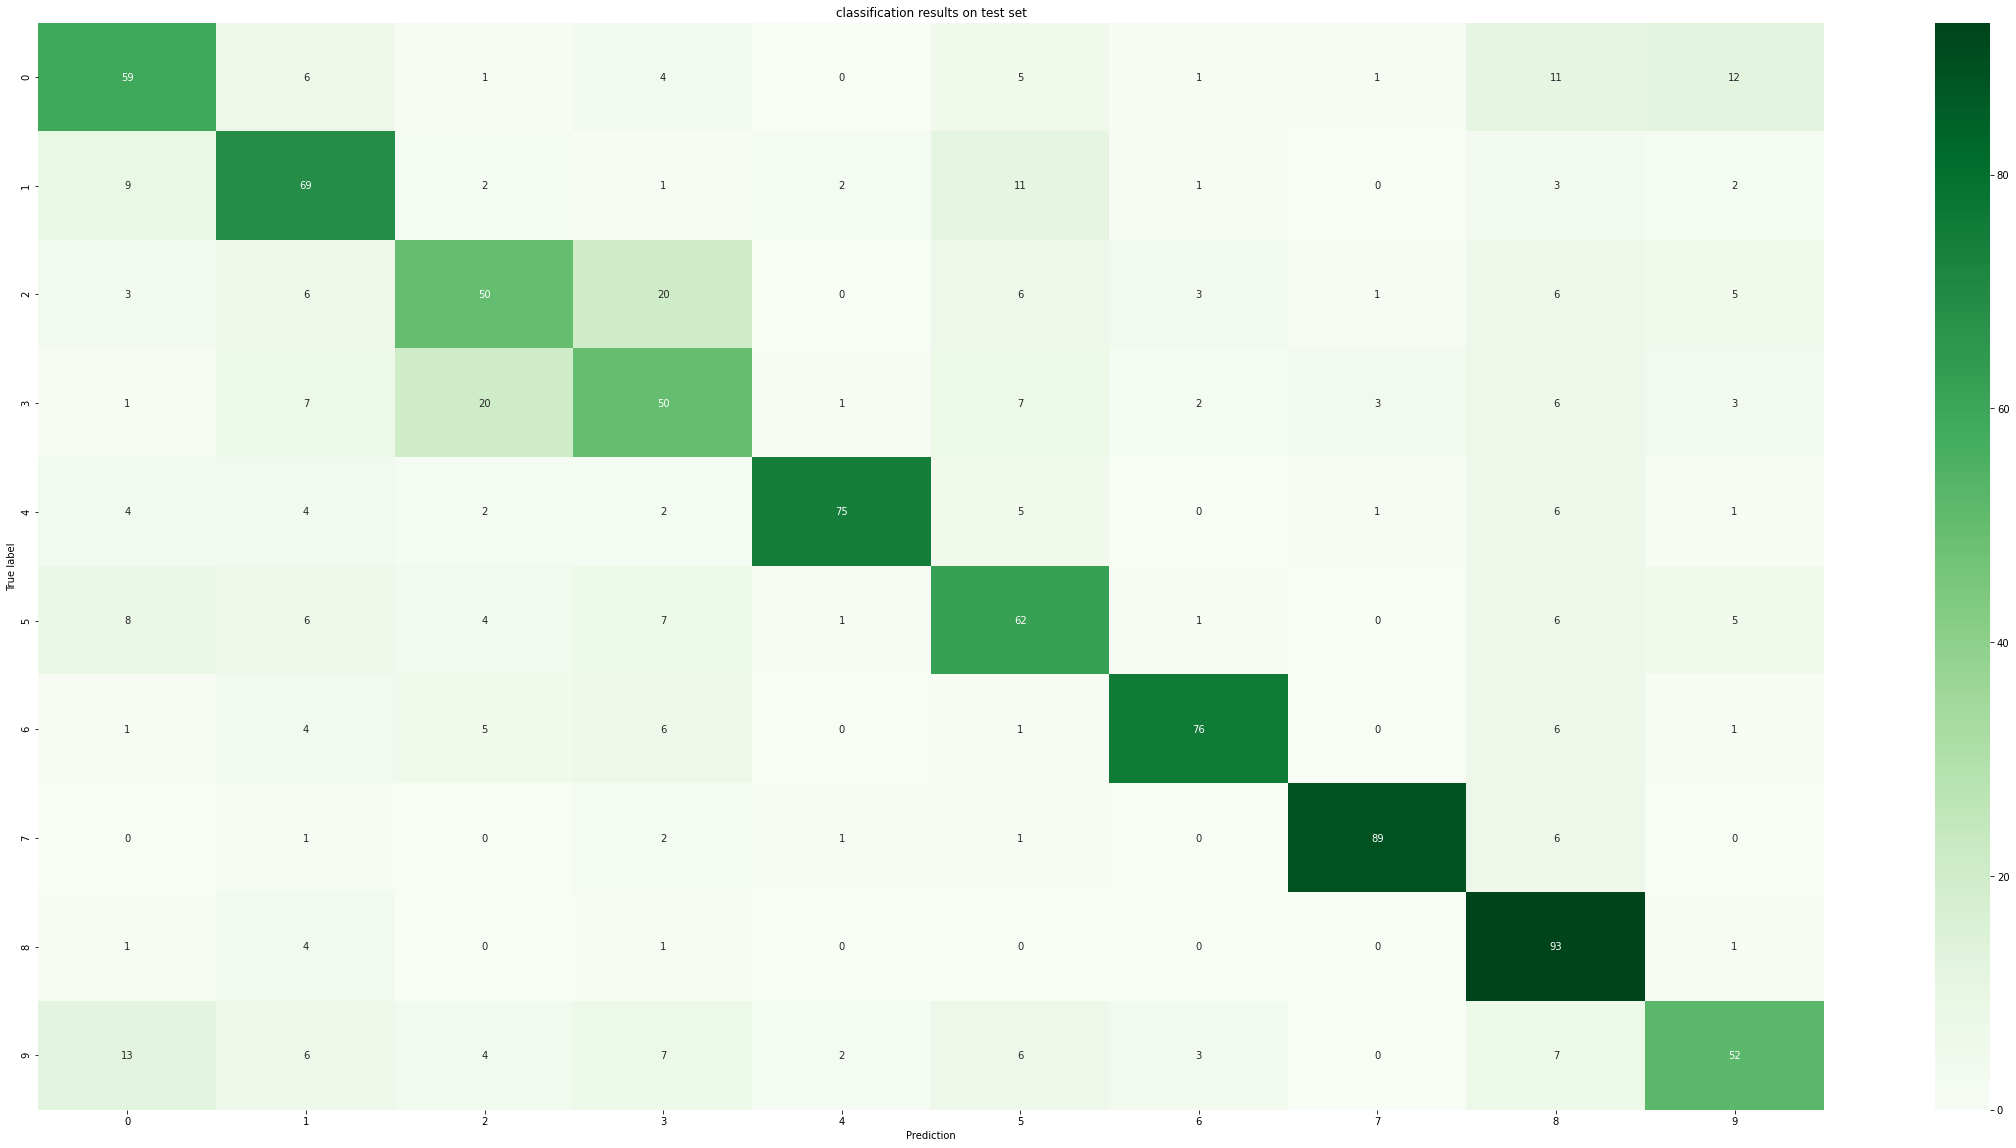

In [89]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')

In [90]:
model = Sequential()
model.add(EfficientNetB0(input_shape = (32, 32, 3), include_top = False, weights = 'imagenet'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(20, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [91]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(learning_rate = 0.001),
             metrics = ['accuracy'])

In [ ]:
#Train the model
hist=model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
63/63 [==============================] - 4s 65ms/step - loss: 1.5501 - accuracy: 0.4790 - val_loss: 1.6041 - val_accuracy: 0.4810
Epoch 2/50
63/63 [==============================] - 2s 35ms/step - loss: 0.8490 - accuracy: 0.7295 - val_loss: 1.0895 - val_accuracy: 0.6840
Epoch 3/50
63/63 [==============================] - 2s 35ms/step - loss: 0.5498 - accuracy: 0.8185 - val_loss: 0.8798 - val_accuracy: 0.7240
Epoch 4/50
57/63 [==========================>...] - ETA: 0s - loss: 0.4250 - accuracy: 0.8643

In [ ]:
model.summary()

In [ ]:
# Plot training & validation loss values
fig, ax = pyplot.subplots(1,2,figsize=(12,4))
ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')
pyplot.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
#plot the confusion matrix
preds = model.predict(x_test)
pred_cat = np.argmax(preds,axis=1)
print('model accuracy on test set is: {0:.2f}%'.format(accuracy_score(np.argmax(y_test,axis=1),pred_cat)*100))
fig, ax = pyplot.subplots(figsize=(40,20))
ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1),pred_cat),cmap='Greens',annot=True, fmt='d')
pyplot.xlabel('Prediction')
pyplot.ylabel('True label')
pyplot.title('classification results on test set')